In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

# plt.style.use('seaborn')

## Load data

In [2]:
df = pd.read_csv('ch2_co2_levels.csv')

# Convert to datetime
df['datestamp'] = pd.to_datetime(df['datestamp'])

# Set datestamp column as index
df = df.set_index('datestamp')

df.head()

,co2
datestamp,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [3]:
df.describe()

,co2
count,2225.000000
mean,340.142247
std,17.003885
min,313.000000
25%,324.800000
50%,338.300000
75%,354.800000
max,373.900000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co2     2225 non-null   float64
dtypes: float64(1)
memory usage: 35.7 KB


In [5]:
# Print out the number of missing values
print(df.isnull().sum())

co2    59
dtype: int64


### Handle missing values

In [6]:
# Impute missing values with the next valid observation
df = df.fillna(method='bfill')

# Print out the number of missing values
print(df.isnull().sum())

co2    0
dtype: int64


### Simple plot

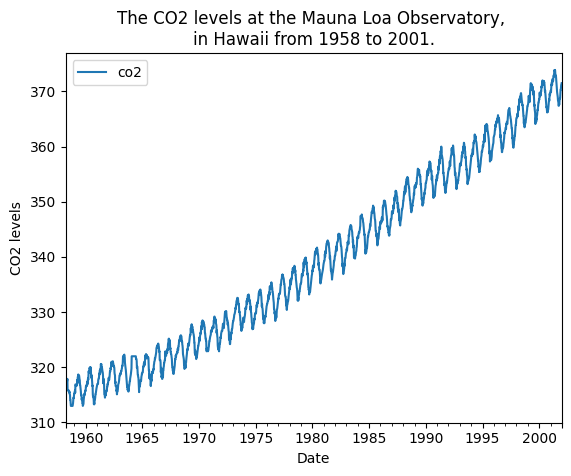

In [7]:
ax = df.plot()

ax.set_xlabel('Date')
ax.set_ylabel('CO2 levels')
ax.set_title('The CO2 levels at the Mauna Loa Observatory, \nin Hawaii from 1958 to 2001.')

plt.show()

## 1. Stationarity

### First-order differencing

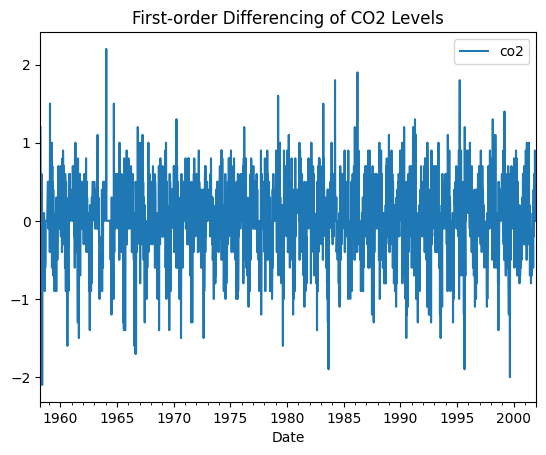

In [8]:
df_diff = df.diff()

ax = df_diff.plot()

ax.set_xlabel('Date')
ax.set_title('First-order Differencing of CO2 Levels')

plt.show()

### Second-order differencing

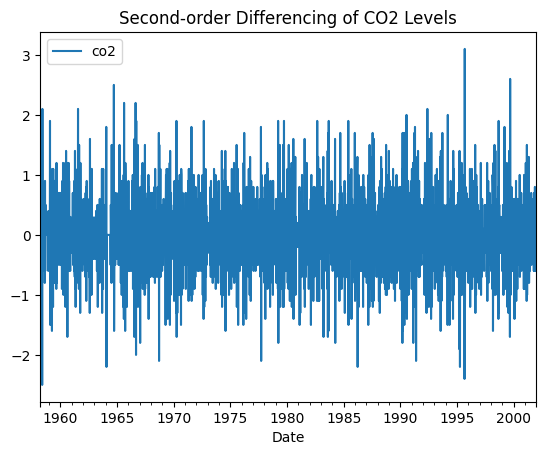

In [9]:
df_second_diff = df.diff().diff()

ax = df_second_diff.plot()

ax.set_xlabel('Date')
ax.set_title('Second-order Differencing of CO2 Levels')

plt.show()

### Seasonal differencing

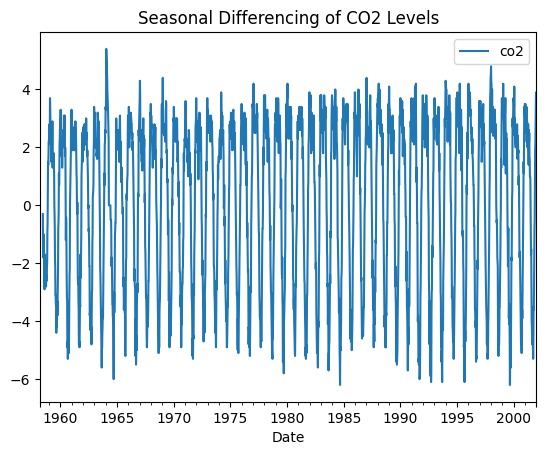

In [10]:
df__seasonal_diff = df.diff(periods=12)

ax = df__seasonal_diff.plot()

ax.set_xlabel('Date')
ax.set_title('Seasonal Differencing of CO2 Levels')

plt.show()

### Detrending by model fitting

In [11]:
from sklearn.linear_model import LinearRegression

df_copy = df.copy()

# Create a numerical time index (e.g., 0, 1, 2, ...)
df_copy['time_index'] = np.arange(len(df))

# Prepare the data for the linear model
X = df_copy['time_index'].values.reshape(-1, 1) # Predictor (time index)
y = df_copy['co2'].values # Response variable (CO2 levels)

# Create and fit the linear model
model = LinearRegression()
model.fit(X, y)

# Predict CO2 levels using the model
predicted_co2 = model.predict(X)

# Detrend the data by subtracting the predicted values from the original CO2 levels
detrended_co2 = df_copy['co2'] - predicted_co2

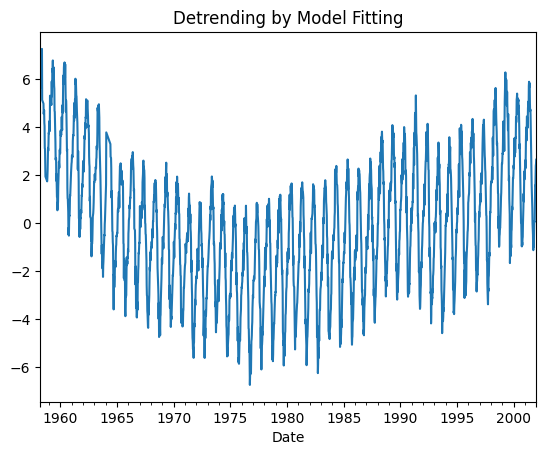

In [12]:
ax = detrended_co2.plot()

ax.set_xlabel('Date')
ax.set_title('Detrending by Model Fitting')

plt.show()

### Log transformation


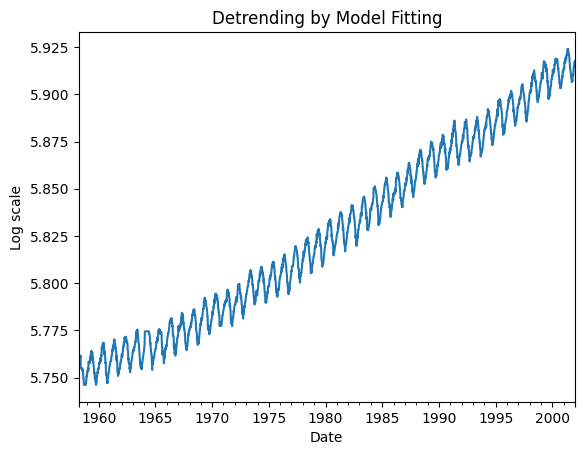

In [13]:
# Applying the natural logarithm transformation to the CO2 levels
df_log_transforme = np.log(df['co2'])

ax = df_log_transforme.plot()

ax.set_xlabel('Date')
ax.set_ylabel('Log scale')
ax.set_title('Detrending by Model Fitting')

plt.show()

## 2. Time-based Features

In [14]:
df_copy = df.copy()

df_copy['month'] = df_copy.index.month
df_copy['day'] = df_copy.index.day

df_copy.head(10)

,co2,month,day
datestamp,,,
1958-03-29,316.1,3,29
1958-04-05,317.3,4,5
1958-04-12,317.6,4,12
1958-04-19,317.5,4,19
1958-04-26,316.4,4,26
1958-05-03,316.9,5,3
1958-05-10,317.5,5,10
1958-05-17,317.5,5,17
1958-05-24,317.9,5,24


## 3. Lag Features

In [15]:
df_copy = df.copy()

# Creating 1, 2, and 3 week lag features
df_copy['lag_1'] = df_copy['co2'].shift(1)
df_copy['lag_2'] = df_copy['co2'].shift(2)
df_copy['lag_3'] = df_copy['co2'].shift(3)

df_copy.head(10)

,co2,lag_1,lag_2,lag_3
datestamp,,,,
1958-03-29,316.1,NaN,NaN,NaN
1958-04-05,317.3,316.1,NaN,NaN
1958-04-12,317.6,317.3,316.1,NaN
1958-04-19,317.5,317.6,317.3,316.1
1958-04-26,316.4,317.5,317.6,317.3
1958-05-03,316.9,316.4,317.5,317.6
1958-05-10,317.5,316.9,316.4,317.5
1958-05-17,317.5,317.5,316.9,316.4
1958-05-24,317.9,317.5,317.5,316.9


## 4. Rolling Window Features

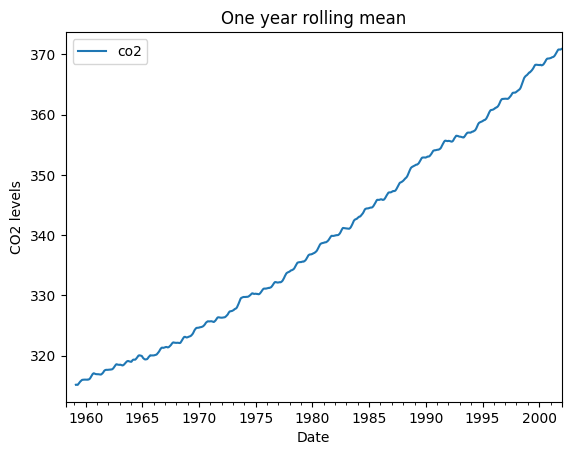

In [16]:
df_mean = df.rolling(window=48).mean()

ax = df_mean.plot()

ax.set_xlabel("Date")
ax.set_ylabel("CO2 levels")  
ax.set_title("One year rolling mean")

plt.show()

## 5. Expanding Window Features

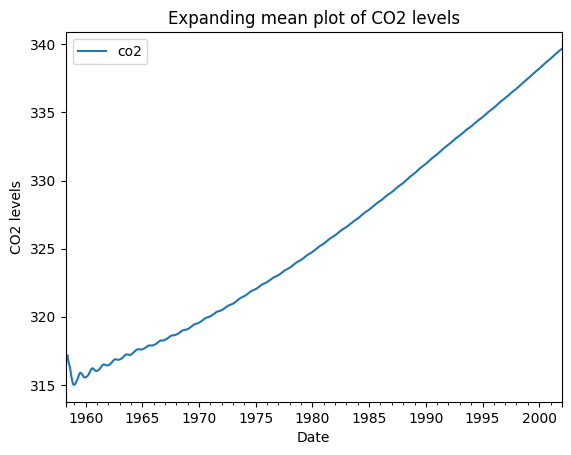

In [17]:
df_expanding = df.expanding().mean()

ax = df_expanding.plot()

ax.set_xlabel("Date")
ax.set_ylabel("CO2 levels")  
ax.set_title("Expanding mean plot of CO2 levels")

plt.show()

## 6. Series Decomposition

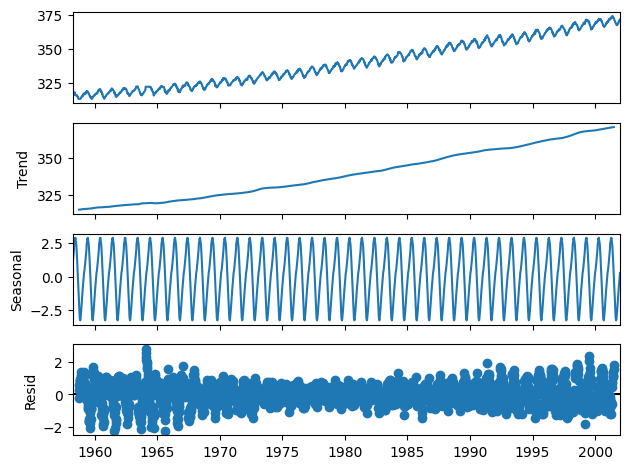

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_copy = df.copy()

# Plot the decomposition for multiplicative series
decomposition_plot = seasonal_decompose(df_copy)
decomposition_plot.plot()

plt.show()

In [24]:
df2 = pd.DataFrame(pd.concat([decomposition_plot.observed, decomposition_plot.trend, decomposition_plot.seasonal, decomposition_plot.resid], axis=1))['1959-03-31':'1959-06-15']
df2.head()

,0,trend,seasonal,resid
datestamp,,,,
1959-04-04,317.7,315.759615,1.235242,0.705142
1959-04-11,317.1,315.760577,1.412344,-0.072921
1959-04-18,317.6,315.765385,1.701186,0.133429
1959-04-25,318.3,315.773077,1.950694,0.576229
1959-05-02,318.2,315.787500,2.032939,0.379561


In [28]:
df2.rename(columns={0: 'CO2'})

,CO2,trend,seasonal,resid
datestamp,,,,
1959-04-04,317.7,315.759615,1.235242,0.705142
1959-04-11,317.1,315.760577,1.412344,-0.072921
1959-04-18,317.6,315.765385,1.701186,0.133429
1959-04-25,318.3,315.773077,1.950694,0.576229
1959-05-02,318.2,315.787500,2.032939,0.379561
1959-05-09,318.7,315.811538,2.445506,0.442955
1959-05-16,318.0,315.840385,2.535041,-0.375426
1959-05-23,318.4,315.872115,2.662031,-0.134147
1959-05-30,318.5,315.899038,2.837948,-0.236987


In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Plot the decomposition for multiplicative series
decomposition_plot = seasonal_decompose(df)